<a href="https://colab.research.google.com/github/mrdso2-iscte/IAA_PROJECT/blob/main/IAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://hdl.handle.net/10071/23232



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
#!pip install kmodes
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn import metrics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Todo o dataset**

In [ ]:
d0=pd.read_csv('2010.csv',sep = ';', encoding="ISO-8859-1")
d1=pd.read_csv('2011.csv',sep = ';', encoding="ISO-8859-1")
d2=pd.read_csv('2012.csv',sep = ';', encoding="ISO-8859-1")
d3=pd.read_csv('2013.csv',sep = ';', encoding="ISO-8859-1")
d4=pd.read_csv('2014.csv',sep = ';', encoding="ISO-8859-1")
d5=pd.read_csv('2015.csv',sep = ';', encoding="ISO-8859-1")
d6=pd.read_csv('2016.csv',sep = ';', encoding="ISO-8859-1")
d7=pd.read_csv('2017.csv',sep = ';', encoding="ISO-8859-1")
d8=pd.read_csv('2018.csv',sep = ';', encoding="ISO-8859-1")
d9=pd.read_csv('2019.csv',sep = ';', encoding="ISO-8859-1")
data=pd.concat([d0, d1,d2,d3,d4,d5,d6,d7,d8,d9], sort=False)


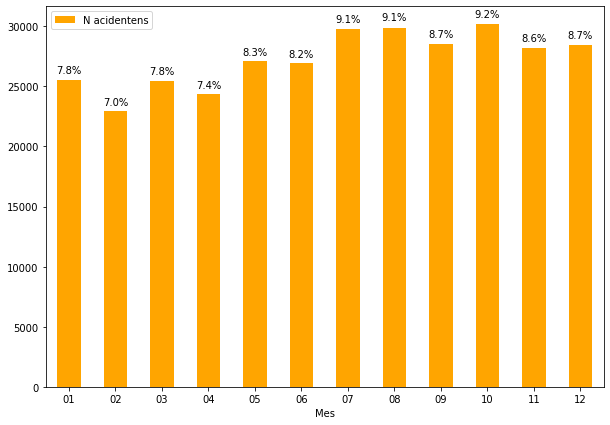

In [ ]:
percentages=[]

mes_groupby=data.groupby(data['Datahora'].str.split(':').str[1])
df = pd.DataFrame({'Mes':mes_groupby.groups.keys(), 'N acidentens':mes_groupby.size()})
ax = df.plot.bar(x='Mes', y='N acidentens', rot=0,figsize=(10, 7),color='orange')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    percentages.append(height/len(data)) 
    ax.annotate(f'{round(height/len(data)*100,1)}%', (x + width/2, y + height*1.02), ha='center')


In [ ]:
new_data= pd.DataFrame(columns = data.columns)
datas=[]

for name, group in mes_groupby:
  d=group.sample(int(round(10000*percentages[int(name)-1]))) 
  new_data.append(d, ignore_index = True)
  datas.append(d)


new_data=datas[0]

for i in range(1,12):
 new_data=pd.concat([new_data,datas[i]], ignore_index = True)

In [ ]:
new_data

,Id. Acidente,Datahora,Dia,Mês,Hora,Entidades Fiscalizadoras,Velocidade local,Velocidade geral,Dia da Semana,Latitude GPS,...,Obstáculos,Sentidos,Sinais,Sinais Luminosos,Tipo Piso,Traçado 1,Traçado 2,Traçado 3,Traçado 4,Via Trânsito
0,2012582830,2012:01:16 13:50:00,01/16/00,01/01/00,01/01/00,Polícia de Segurança Pública,50.0,50.0,Segunda-Feira,"0,00",...,Inexistentes,No sentido decrescente da quilometragem,Outros,Inexistentes,Betuminoso,Recta,Em patamar,Berma não pavimentada,Em plena via,Direita
1,2010443105,2010:01:22 16:25:00,01/22/00,01/01/00,01/01/00,Guarda Nacional Republicana,50.0,90.0,Sexta-Feira,"39,18215",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Direita
2,2013686634,2013:01:10 02:00:00,01/10/00,01/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Quinta-Feira,NaN,...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Direita
3,2010427016,2010:01:16 08:30:00,01/16/00,01/01/00,01/01/00,Polícia de Segurança Pública,50.0,50.0,Sábado,"0,00",...,Inexistentes,NÃO DEFINIDO,Passagem de peões,Inexistentes,Betuminoso,Recta,Com inclinação,Berma pavimentada,Em plena via,Direita
4,2015932423,2015:01:31 12:00:00,01/31/00,01/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Sábado,"38,733215",...,Inexistentes,NÃO DEFINIDO,Outros,Inexistentes,Betuminoso,Curva,Em patamar,Berma pavimentada,Em plena via,Direita
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20181631698,2018:12:14 20:00:00,01/14/00,12/01/00,01/01/00,Polícia de Segurança Pública,80.0,80.0,Sexta-Feira,"38,763441",...,Inexistentes,No sentido crescente da quilometragem,Outros,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Esquerda
9996,20191817131,2019:12:15 11:40:00,01/15/00,12/01/00,01/01/00,Guarda Nacional Republicana,50.0,90.0,Domingo,"41,56662",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Curva,Com inclinação,Berma não pavimentada,Em plena via,Direita
9997,2013670966,2012:12:25 20:00:00,01/25/00,12/01/00,01/01/00,Guarda Nacional Republicana,50.0,50.0,Terça-Feira,NaN,...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Curva,Com inclinação,Sem berma ou impraticável,Em plena via,Direita
9998,20181355717,2017:12:25 20:05:00,01/25/00,12/01/00,01/01/00,Guarda Nacional Republicana,90.0,90.0,Segunda-Feira,"40,852293",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Curva,Com inclinação,Sem berma ou impraticável,Na berma,Direita


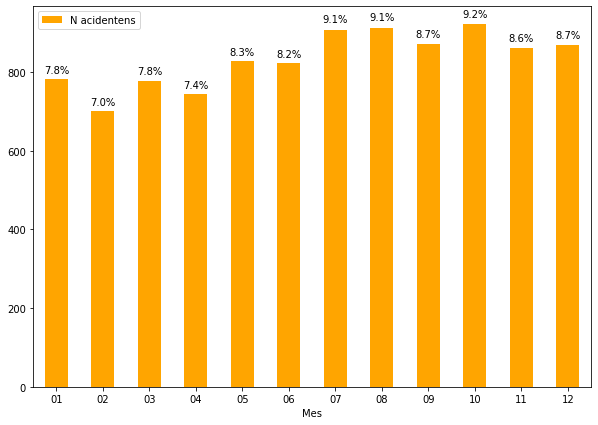

In [ ]:
percentages=[]
mes_groupby=new_data.groupby(new_data['Datahora'].str.split(':').str[1])
df = pd.DataFrame({'Mes':mes_groupby.groups.keys(), 'N acidentens':mes_groupby.size()})
ax = df.plot.bar(x='Mes', y='N acidentens', rot=0,figsize=(10, 7),color='orange')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    percentages.append(height/len(new_data)) 
    ax.annotate(f'{round(height/len(new_data)*100,1)}%', (x + width/2, y + height*1.02), ha='center')

In [ ]:
new_data.to_csv('acidentes.csv', index=False)

# **Pergunta 1**

1. Extract a random sample of 10000+ examples taking random examples from all files
from 2010 to 2019. Save the sample;

In [ ]:
acidentes_df=pd.read_csv('acidentes.csv',sep = ',')

In [ ]:
acidentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Id. Acidente                     10000 non-null  int64  
 1   Datahora                         10000 non-null  object 
 2   Dia                              10000 non-null  object 
 3   Mês                              10000 non-null  object 
 4   Hora                             10000 non-null  object 
 5   Entidades Fiscalizadoras         10000 non-null  object 
 6   Velocidade local                 9909 non-null   float64
 7   Velocidade geral                 9995 non-null   float64
 8   Dia da Semana                    10000 non-null  object 
 9   Latitude GPS                     8950 non-null   object 
 10  Longitude GPS                    8950 non-null   object 
 11  Num. Mortos a 30 dias            10000 non-null  int64  
 12  Num. Feridos graves

In [ ]:
import io
buffer = io.StringIO()
acidentes_df.info(buf=buffer)
s = buffer.getvalue()
with open("df_info.csv", "w",
          encoding="utf-8") as f:  
    f.write(s)

# **Pergunta 2**


2. Decide which (if any) characteristics should be normalized, discretized, or change format
in any way. Perform these transformations in the sample and save the new file
under a different name;

### Categorizaçao Periodos do Dia

In [ ]:
acidentes_df['Periodo do Dia']=acidentes_df['Datahora'].str.split(' ').str[-1]     

## METER A COLUNA DATAHORA PARA DATETIME
acidentes_df['Periodo do Dia'] = pd.to_datetime(acidentes_df['Periodo do Dia'])
     

In [ ]:

slots=['06:00:00','12:00:00','18:00:00']
hours=pd.to_datetime(slots)

day_slots=[]
for index in acidentes_df.index:
  
  if acidentes_df['Periodo do Dia'][index] < hours[0]:
    day_slots.append('Madrugada')
  elif (acidentes_df['Periodo do Dia'][index] >= hours[0]) & (acidentes_df['Periodo do Dia'][index] < hours[1]):
    day_slots.append('Manha')
  elif  (acidentes_df['Periodo do Dia'][index] >= hours[1]) & (acidentes_df['Periodo do Dia'][index] < hours[2]):
    day_slots.append('Tarde')
  else:
    day_slots.append('Noite')



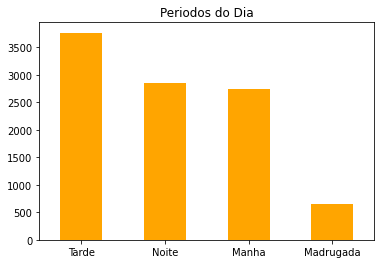

In [ ]:
acidentes_df['Periodo do Dia']=day_slots
acidentes_df['Periodo do Dia'].value_counts().plot(kind = 'bar',rot = 0,color='orange',title="Periodos do Dia")

### Categorização Tipo de acidentes

In [ ]:
accident_type=[]
for index in acidentes_df.index: 
  if (acidentes_df['Num. Mortos a 30 dias'][index]>0):    
    accident_type.append('muito grave')
  elif (acidentes_df['Num. Feridos graves a 30 dias'][index]>0) & (acidentes_df['Num. Mortos a 30 dias'][index]==0):
    accident_type.append('grave')
  else:
     accident_type.append('ligeiro')
print(len(accident_type))


10000


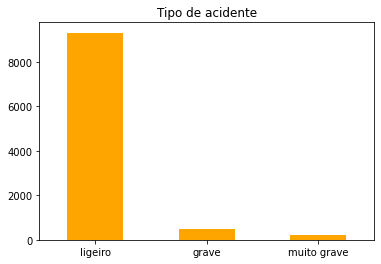

In [ ]:
acidentes_df['Tipo de Acidente']=accident_type
acidentes_df['Tipo de Acidente'].value_counts().plot(kind = 'bar',rot = 0,color='orange',title="Tipo de acidente")

### Categorização concelhos

In [ ]:
acidentes_df=acidentes_df.replace('Sobral Monte Agraco','Sobral de Monte Agraco')
acidentes_df=acidentes_df.replace('Lagoa (Algarve)','Lagoa')
acidentes_df=acidentes_df.replace('Freixo Espada a Cinta','Freixo de Espada a Cinta')


In [ ]:
nuts_site_df=pd.read_csv('nuts_site.csv',sep = ';', encoding="ISO-8859-1")
nuts_site_df= nuts_site_df[['NUTS II','CONCELHO']]
drop_elements= nuts_site_df[(nuts_site_df['NUTS II']=='REGIÃO AUTÓNOMA DOS AÇORES') | (nuts_site_df['NUTS II']=='REGIÃO AUTÓNOMA DA MADEIRA')].index
nuts_site_df.drop(drop_elements, inplace=True)
nuts_site_df = nuts_site_df.drop_duplicates(keep='first')
cols = nuts_site_df.select_dtypes(include=[object]).columns
nuts_site_df[cols] = nuts_site_df[cols].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))
nuts_site_df





,NUTS II,CONCELHO
0,CENTRO,Agueda
11,CENTRO,Albergaria-a-Velha
17,CENTRO,Anadia
27,NORTE,Arouca
43,CENTRO,Aveiro
...,...,...
2816,NORTE,Tarouca
2823,CENTRO,Tondela
2842,CENTRO,Vila Nova de Paiva
2847,CENTRO,Viseu


In [ ]:
for ind in acidentes_df['Concelho'].index:
  concelho =acidentes_df['Concelho'][ind]
  print(concelho)
  zona=nuts_site_df[(nuts_site_df['CONCELHO']==concelho)].values
  acidentes_df['Concelho'][ind]=zona[0][0]


Coimbra
Peniche
Sobral de Monte Agraco
Seixal
Cascais
Lisboa
Vila Nova de Famalicao
Cartaxo
Albergaria-a-Velha
Lisboa
Gondomar
Vizela
Macedo de Cavaleiros
Loures
Lisboa
Cadaval
Covilha
Viana do Castelo
Viseu
Gondomar
Oeiras
Seixal
Lisboa
Almada
Barcelos
Evora
Setubal
Lisboa
Santa Maria da Feira
Vila do Conde
Covilha
Montijo
Olhao
Penafiel
Lisboa
Coimbra
Vila Nova de Gaia
Leiria
Lisboa
Tondela
Vila do Conde
Marinha Grande
Mealhada
Cartaxo
Viana do Castelo
Montijo
Vila Nova de Gaia
Lisboa
Barcelos
Leiria
Loures
Vila Franca de Xira
Lisboa
Vila do Conde
Braga
Pacos de Ferreira
Amadora
Loures
Penafiel
Trofa
Porto
Mirandela
Palmela
Cantanhede
Torres Novas
Lourinha
Sintra
Vila Nova de Gaia
Santarem
Marco de Canaveses
Cartaxo
Albufeira
Cascais
Guimaraes
Lisboa
Mangualde
Caldas da Rainha
Cadaval
Cascais
Braga
Loures
Freixo de Espada a Cinta
Leiria
Fafe
Beja
Amarante
Sintra
Amadora
Carrazeda de Ansiaes
Porto de Mos
Oliveira do Hospital
Povoa de Varzim
Estarreja
Vila de Rei
Sintra
Coimbra
Aveiro


<ipython-input-149-f3da13a2f5c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acidentes_df['Concelho'][ind]=zona[0][0]


A saída de streaming foi truncada nas últimas 5000 linhas.
Mirandela
Alcobaca
Rio Maior
Porto
Lisboa
Oeiras
Povoa de Lanhoso
Figueira da Foz
Barcelos
Santarem
Loures
Mafra
Santa Maria da Feira
Braga
Lisboa
Cascais
Barcelos
Vila Nova de Famalicao
Vila Nova de Gaia
Viana do Castelo
Vila Franca de Xira
Lisboa
Figueira da Foz
Porto
Setubal
Oliveira do Bairro
Soure
Fundao
Cascais
Almada
Viseu
Penafiel
Mora
Almada
Olhao
Sintra
Santo Tirso
Grandola
Porto
Felgueiras
Santiago do Cacem
Vila do Conde
Mafra
Oeiras
Albufeira
Vila Nova de Gaia
Santa Maria da Feira
Vieira do Minho
Santo Tirso
Vila Nova de Famalicao
Viana do Castelo
Sintra
Murca
Cascais
Sintra
Fornos de Algodres
Braga
Salvaterra de Magos
Fundao
Matosinhos
Bombarral
Loures
Castelo Branco
Albufeira
Vila Franca de Xira
Guimaraes
Amadora
Azambuja
Covilha
Albufeira
Setubal
Portimao
Viana do Castelo
Torres Vedras
Porto
Porto
Barcelos
Santarem
Santarem
Azambuja
Vila do Conde
Espinho
Setubal
Gondomar
Portimao
Sintra
Santo Tirso
Figueira da Fo

In [ ]:
pd.unique(acidentes_df['Concelho'])


array(['CENTRO', 'AREA METROPOLITANA DE LISBOA', 'NORTE', 'ALENTEJO',
       'ALGARVE'], dtype=object)

In [ ]:
acidentes_df=acidentes_df.rename(columns={"Concelho": "Zona"})

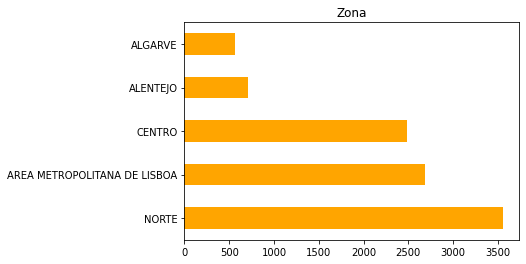

In [ ]:
acidentes_df['Zona'].value_counts().plot(kind = 'barh',rot = 0,color='orange',title="Zona")

### Imputação de dados  velocidade local

In [ ]:

velocidades=np.unique(acidentes_df['Velocidade local'])
velocidade_local_not_null=acidentes_df[acidentes_df['Velocidade local'].notnull()]
velocidade_local_null=acidentes_df[acidentes_df['Velocidade local'].isnull()]
velocidade_geral_null=acidentes_df[acidentes_df['Velocidade geral'].isnull()]

for ind in velocidade_local_null.index:
 
  if(pd.isnull(acidentes_df['Velocidade geral'][ind]) ):    
    tipo_via=acidentes_df['Tipos Vias'][ind]
    velocidade=[]
    velocidade += [acidentes_df['Velocidade local'][index] for index in velocidade_local_not_null.index if acidentes_df['Tipos Vias'][index] == tipo_via]
    mean_velocidade=(np.mean(velocidade))    
    closest = min(velocidades, key=lambda x: abs(x-mean_velocidade))
    acidentes_df['Velocidade local'][ind]= closest

  else:
    acidentes_df['Velocidade local'][ind]= acidentes_df['Velocidade geral'][ind]




<ipython-input-153-1f5f1a693b91>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acidentes_df['Velocidade local'][ind]= acidentes_df['Velocidade geral'][ind]
<ipython-input-153-1f5f1a693b91>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acidentes_df['Velocidade local'][ind]= closest


### Vizualização 'Características Tecnicas1','Tipos Vias'

In [ ]:
groupby = acidentes_df.groupby([ 'Características Tecnicas1','Tipos Vias']).size()
print(groupby)

Características Tecnicas1  Tipos Vias                  
Auto-estrada               A  - Auto-Estrada                604
Estrada sem separador      Arruamento                      5265
                           EF - Estrada Florestal            18
                           EM - Estrada Municipal           523
                           EN - Estrada Nacional           1946
                           ER - Estrada Regional             49
                           IC - Itinerário Complementar     102
                           IP- Itinerário Principal          24
                           Outra Via                        174
                           PNT - Ponte                        1
                           VAR - Variante                    16
NÃO DEFINIDO               Arruamento                        32
                           EM - Estrada Municipal             2
                           EN - Estrada Nacional             15
                           IC - Itinerário Compl

### Rename coluna Datahora

In [ ]:
acidentes_df['Data']=acidentes_df['Datahora'].str.split(' ').str[0]

### Categorização Natureza do acidente

In [ ]:
despiste=['Despiste sem dispositivo de retenção', 'Despiste simples','Despiste com colisão com veículo imobil. ou obstáculo','Despiste com capotamento', 'Despiste com dispositivo de retenção',
       'Despiste com transposição do dispositivo de retenção lateral',
       'Despiste com fuga']
colisão=['Colisão traseira com outro veículo em movimento','Colisão lateral com outro veículo em movimento'
,'Colisão frontal', 'Colisão com outras situações','Colisão choque em cadeia','Colisão com veiculo ou obstáculo na faixa de rodagem','Colisão com fuga']
atropelamento=['Atropelamento de peões', 'Atropelamento de animais',  'Atropelamento com fuga' ]
natureza_type=[]
for index in acidentes_df.index: 
  if (acidentes_df['Natureza'][index] in despiste ):    
    natureza_type.append('despiste')
  elif (acidentes_df['Natureza'][index] in colisão ):
   natureza_type.append('colisão')
  else:
    natureza_type.append('atropelamento')
print(len(natureza_type))

10000


In [ ]:
acidentes_df['Natureza']=natureza_type

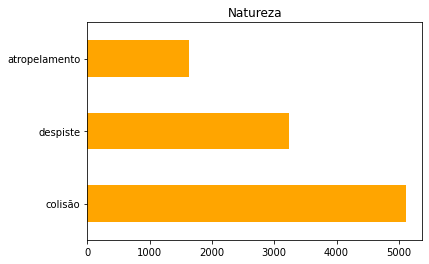

In [ ]:
acidentes_df['Natureza'].value_counts().plot(kind = 'barh',rot = 0,color='orange',title="Natureza")

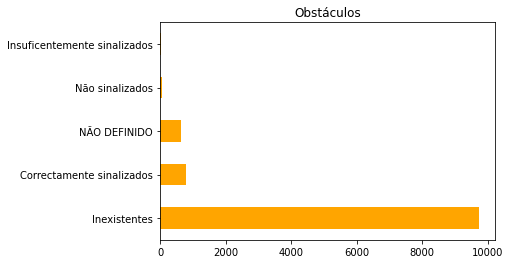

In [ ]:
acidentes_df['Sentidos'].value_counts().plot(kind = 'barh',rot = 0,color='orange',title="Sentidos")
acidentes_df['Obstáculos'].value_counts().plot(kind = 'barh',rot = 0,color='orange',title="Obstáculos")

In [ ]:
acidentes_df=acidentes_df.drop(['Id. Acidente','Datahora','Dia','Hora','Mês','Entidades Fiscalizadoras','Num. Mortos a 30 dias','Num. Feridos graves a 30 dias','Num. Feridos ligeiros a 30 dias', 'Obstáculos','Características Tecnicas1','Sentidos','Velocidade geral','Latitude GPS','Km','Longitude GPS','Distrito', 'Freguesia', 'Pov. Proxima','Nome arruamento','Cod Via'], axis=1)


In [ ]:
acidentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Velocidade local       10000 non-null  float64
 1   Dia da Semana          10000 non-null  object 
 2   Cond Aderência         10000 non-null  object 
 3   Zona                   10000 non-null  object 
 4   Tipos Vias             10000 non-null  object 
 5   Estado Conservação     10000 non-null  object 
 6   Factores Atmosféricos  10000 non-null  object 
 7   Reg Circulação1        10000 non-null  object 
 8   Intersecção Vias       10000 non-null  object 
 9   Localizações           10000 non-null  object 
 10  Luminosidade           10000 non-null  object 
 11  Marca Via              10000 non-null  object 
 12  Natureza               10000 non-null  object 
 13  Obras Arte             10000 non-null  object 
 14  Sinais                 10000 non-null  object 
 15  Sin

In [ ]:
acidentes_df

,Velocidade local,Dia da Semana,Cond Aderência,Zona,Tipos Vias,Estado Conservação,Factores Atmosféricos,Reg Circulação1,Intersecção Vias,Localizações,...,Sinais Luminosos,Tipo Piso,Traçado 1,Traçado 2,Traçado 3,Traçado 4,Via Trânsito,Periodo do Dia,Tipo de Acidente,Data
0,50.0,Segunda-Feira,Húmido,CENTRO,Arruamento,Em estado regular,Bom tempo,Dois sentidos,Fora da intersecção,Dentro das localidades,...,Inexistentes,Betuminoso,Recta,Em patamar,Berma não pavimentada,Em plena via,Direita,Tarde,ligeiro,2012:01:16
1,50.0,Sexta-Feira,Seco e limpo,CENTRO,EN - Estrada Nacional,Em estado regular,Bom tempo,Dois sentidos,Fora da intersecção,Dentro das localidades,...,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Direita,Tarde,ligeiro,2010:01:22
2,50.0,Quinta-Feira,Húmido,CENTRO,EN - Estrada Nacional,Em estado regular,Chuva,Dois sentidos,Fora da intersecção,Dentro das localidades,...,Inexistentes,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Direita,Madrugada,ligeiro,2013:01:10
3,50.0,Sábado,Húmido,AREA METROPOLITANA DE LISBOA,Arruamento,Em estado regular,Bom tempo,Dois sentidos,Fora da intersecção,Dentro das localidades,...,Inexistentes,Betuminoso,Recta,Com inclinação,Berma pavimentada,Em plena via,Direita,Manha,ligeiro,2010:01:16
4,50.0,Sábado,Seco e limpo,AREA METROPOLITANA DE LISBOA,Arruamento,Em bom estado,Bom tempo,Dois sentidos,Fora da intersecção,Dentro das localidades,...,Inexistentes,Betuminoso,Curva,Em patamar,Berma pavimentada,Em plena via,Direita,Tarde,ligeiro,2015:01:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,80.0,Sexta-Feira,Seco e limpo,AREA METROPOLITANA DE LISBOA,Arruamento,Em estado regular,Bom tempo,Sentido único,Fora da intersecção,Dentro das localidades,...,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Esquerda,Noite,ligeiro,2018:12:14
9996,50.0,Domingo,Molhado,NORTE,EN - Estrada Nacional,Em estado regular,Chuva,Dois sentidos,Fora da intersecção,Dentro das localidades,...,Inexistentes,Betuminoso,Curva,Com inclinação,Berma não pavimentada,Em plena via,Direita,Manha,ligeiro,2019:12:15
9997,50.0,Terça-Feira,Molhado,CENTRO,EM - Estrada Municipal,Em bom estado,Bom tempo,Dois sentidos,Fora da intersecção,Fora das localidades,...,Inexistentes,Betuminoso,Curva,Com inclinação,Sem berma ou impraticável,Em plena via,Direita,Noite,ligeiro,2012:12:25
9998,90.0,Segunda-Feira,Húmido,NORTE,EM - Estrada Municipal,Em bom estado,Chuva,Dois sentidos,Fora da intersecção,Fora das localidades,...,Inexistentes,Betuminoso,Curva,Com inclinação,Sem berma ou impraticável,Na berma,Direita,Noite,ligeiro,2017:12:25


In [ ]:
acidentes_df.to_csv('acidentes_selected.csv', index=False)

# **Pergunta 3**

3. Verify which characteristics are seasonal (have different average values in different times of the year). Provide graphical views of these seasonal differences;

In [3]:
acidentes_df=pd.read_csv('acidentes_selected.csv',sep = ',')

In [ ]:
acidentes_df

,Velocidade local,Dia da Semana,Cond Aderência,Zona,Tipos Vias,Estado Conservação,Factores Atmosféricos,Reg Circulação1,Intersecção Vias,Localizações,...,Sinais Luminosos,Tipo Piso,Traçado 1,Traçado 2,Traçado 3,Traçado 4,Via Trânsito,Periodo do Dia,Tipo de Acidente,Data
0,50.0,Segunda-Feira,Húmido,CENTRO,Arruamento,Em estado regular,Bom tempo,Dois sentidos,Fora da intersecção,Dentro das localidades,...,Inexistentes,Betuminoso,Recta,Em patamar,Berma não pavimentada,Em plena via,Direita,Tarde,ligeiro,2012:01:16
1,50.0,Sexta-Feira,Seco e limpo,CENTRO,EN - Estrada Nacional,Em estado regular,Bom tempo,Dois sentidos,Fora da intersecção,Dentro das localidades,...,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Direita,Tarde,ligeiro,2010:01:22
2,50.0,Quinta-Feira,Húmido,CENTRO,EN - Estrada Nacional,Em estado regular,Chuva,Dois sentidos,Fora da intersecção,Dentro das localidades,...,Inexistentes,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Direita,Madrugada,ligeiro,2013:01:10
3,50.0,Sábado,Húmido,AREA METROPOLITANA DE LISBOA,Arruamento,Em estado regular,Bom tempo,Dois sentidos,Fora da intersecção,Dentro das localidades,...,Inexistentes,Betuminoso,Recta,Com inclinação,Berma pavimentada,Em plena via,Direita,Manha,ligeiro,2010:01:16
4,50.0,Sábado,Seco e limpo,AREA METROPOLITANA DE LISBOA,Arruamento,Em bom estado,Bom tempo,Dois sentidos,Fora da intersecção,Dentro das localidades,...,Inexistentes,Betuminoso,Curva,Em patamar,Berma pavimentada,Em plena via,Direita,Tarde,ligeiro,2015:01:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,80.0,Sexta-Feira,Seco e limpo,AREA METROPOLITANA DE LISBOA,Arruamento,Em estado regular,Bom tempo,Sentido único,Fora da intersecção,Dentro das localidades,...,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Esquerda,Noite,ligeiro,2018:12:14
9996,50.0,Domingo,Molhado,NORTE,EN - Estrada Nacional,Em estado regular,Chuva,Dois sentidos,Fora da intersecção,Dentro das localidades,...,Inexistentes,Betuminoso,Curva,Com inclinação,Berma não pavimentada,Em plena via,Direita,Manha,ligeiro,2019:12:15
9997,50.0,Terça-Feira,Molhado,CENTRO,EM - Estrada Municipal,Em bom estado,Bom tempo,Dois sentidos,Fora da intersecção,Fora das localidades,...,Inexistentes,Betuminoso,Curva,Com inclinação,Sem berma ou impraticável,Em plena via,Direita,Noite,ligeiro,2012:12:25
9998,90.0,Segunda-Feira,Húmido,NORTE,EM - Estrada Municipal,Em bom estado,Chuva,Dois sentidos,Fora da intersecção,Fora das localidades,...,Inexistentes,Betuminoso,Curva,Com inclinação,Sem berma ou impraticável,Na berma,Direita,Noite,ligeiro,2017:12:25


In [ ]:
#estacoes
estacoes_df = pd.to_datetime(acidentes_df['Data'], format='%Y:%m:%d')

s_spring=pd.to_datetime('20:03',format='%d:%m')
s_summer=pd.to_datetime('21:06',format='%d:%m')
s_autumn=pd.to_datetime('23:09',format='%d:%m')
s_winter=pd.to_datetime('21:12',format='%d:%m')

estacoes=[]
for index in estacoes_df.index:  
  if estacoes_df[index].month > s_spring.month and estacoes_df[index].month < s_summer.month:
    estacoes.append('Primavera')
  elif estacoes_df[index].month == s_spring.month and estacoes_df[index].month == s_summer.month:
    if estacoes_df[index].day >= s_spring.day and estacoes_df[index].day < s_summer.day:
      estacoes.append('Primavera')    
  elif estacoes_df[index].month > s_summer.month and estacoes_df[index].month < s_autumn.month:
    estacoes.append('Verao')
  elif estacoes_df[index].month == s_summer.month and estacoes_df[index].month == s_autumn.month:
    if estacoes_df[index].day >= s_summer.day and estacoes_df[index].day < s_autumn.day:
      estacoes.append('Verao')
  elif estacoes_df[index].month > s_autumn.month and estacoes_df[index].month < s_winter.month:
    estacoes.append('Outono')
  elif estacoes_df[index].month == s_autumn.month and estacoes_df[index].month == s_winter.month:
    if estacoes_df[index].day >= s_autumn.day and estacoes_df[index].day < s_winter.day:
      estacoes.append('Outono')
  else:
     estacoes.append('Inervno')







Text(0.5, 1.0, 'N acidentes por estação do ano')

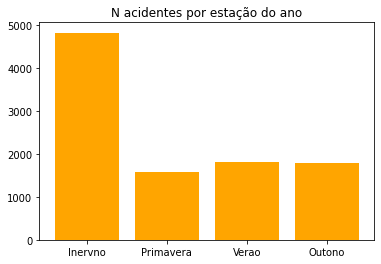

In [ ]:
estacoes_dict= dict((i, estacoes.count(i)) for i in estacoes)
plt.bar(estacoes_dict.keys(), estacoes_dict.values(),   width = 0.8, color = 'orange')
plt.title("N acidentes por estação do ano")


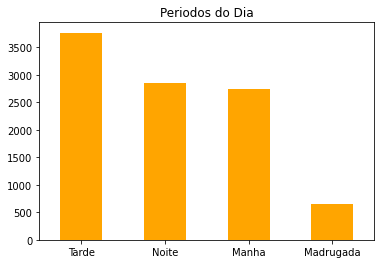

In [ ]:
#Periodo do dia

acidentes_df['Periodo do Dia'].value_counts().plot(kind = 'bar',rot = 0,color='orange',title="Periodos do Dia")

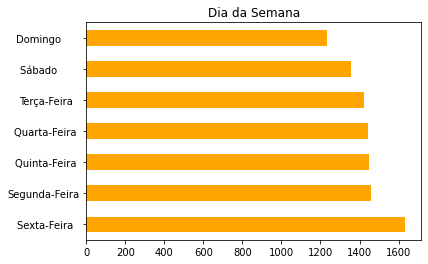

In [ ]:
#dias da semana
acidentes_df['Dia da Semana'].value_counts().plot(kind = 'barh',rot = 0,color='orange',title="Dia da Semana")

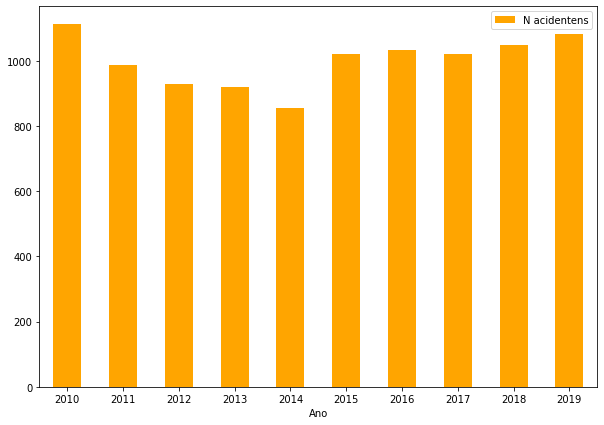

In [ ]:
ano_groupby=acidentes_df.groupby(acidentes_df['Data'].str.split(':').str[0])
df = pd.DataFrame({'Ano':ano_groupby.groups.keys(), 'N acidentens':ano_groupby.size()})
ax = df.plot.bar(x='Ano', y='N acidentens', rot=0,figsize=(10, 7),color='orange')

# **Pergunta 4**

4. Verify which characteristics are unbalanced (have much more elements of one class
than the others). Present graphical views of the distributions of some unbalanced
characteristics you deem relevant for the problem;

In [ ]:
acidentes_df.columns

Index(['Velocidade local', 'Dia da Semana', 'Cond Aderência', 'Zona',
       'Tipos Vias', 'Estado Conservação', 'Factores Atmosféricos',
       'Reg Circulação1', 'Intersecção Vias', 'Localizações', 'Luminosidade',
       'Marca Via', 'Natureza', 'Obras Arte', 'Sinais', 'Sinais Luminosos',
       'Tipo Piso', 'Traçado 1', 'Traçado 2', 'Traçado 3', 'Traçado 4',
       'Via Trânsito', 'Periodo do Dia', 'Tipo de Acidente', 'Data'],
      dtype='object')

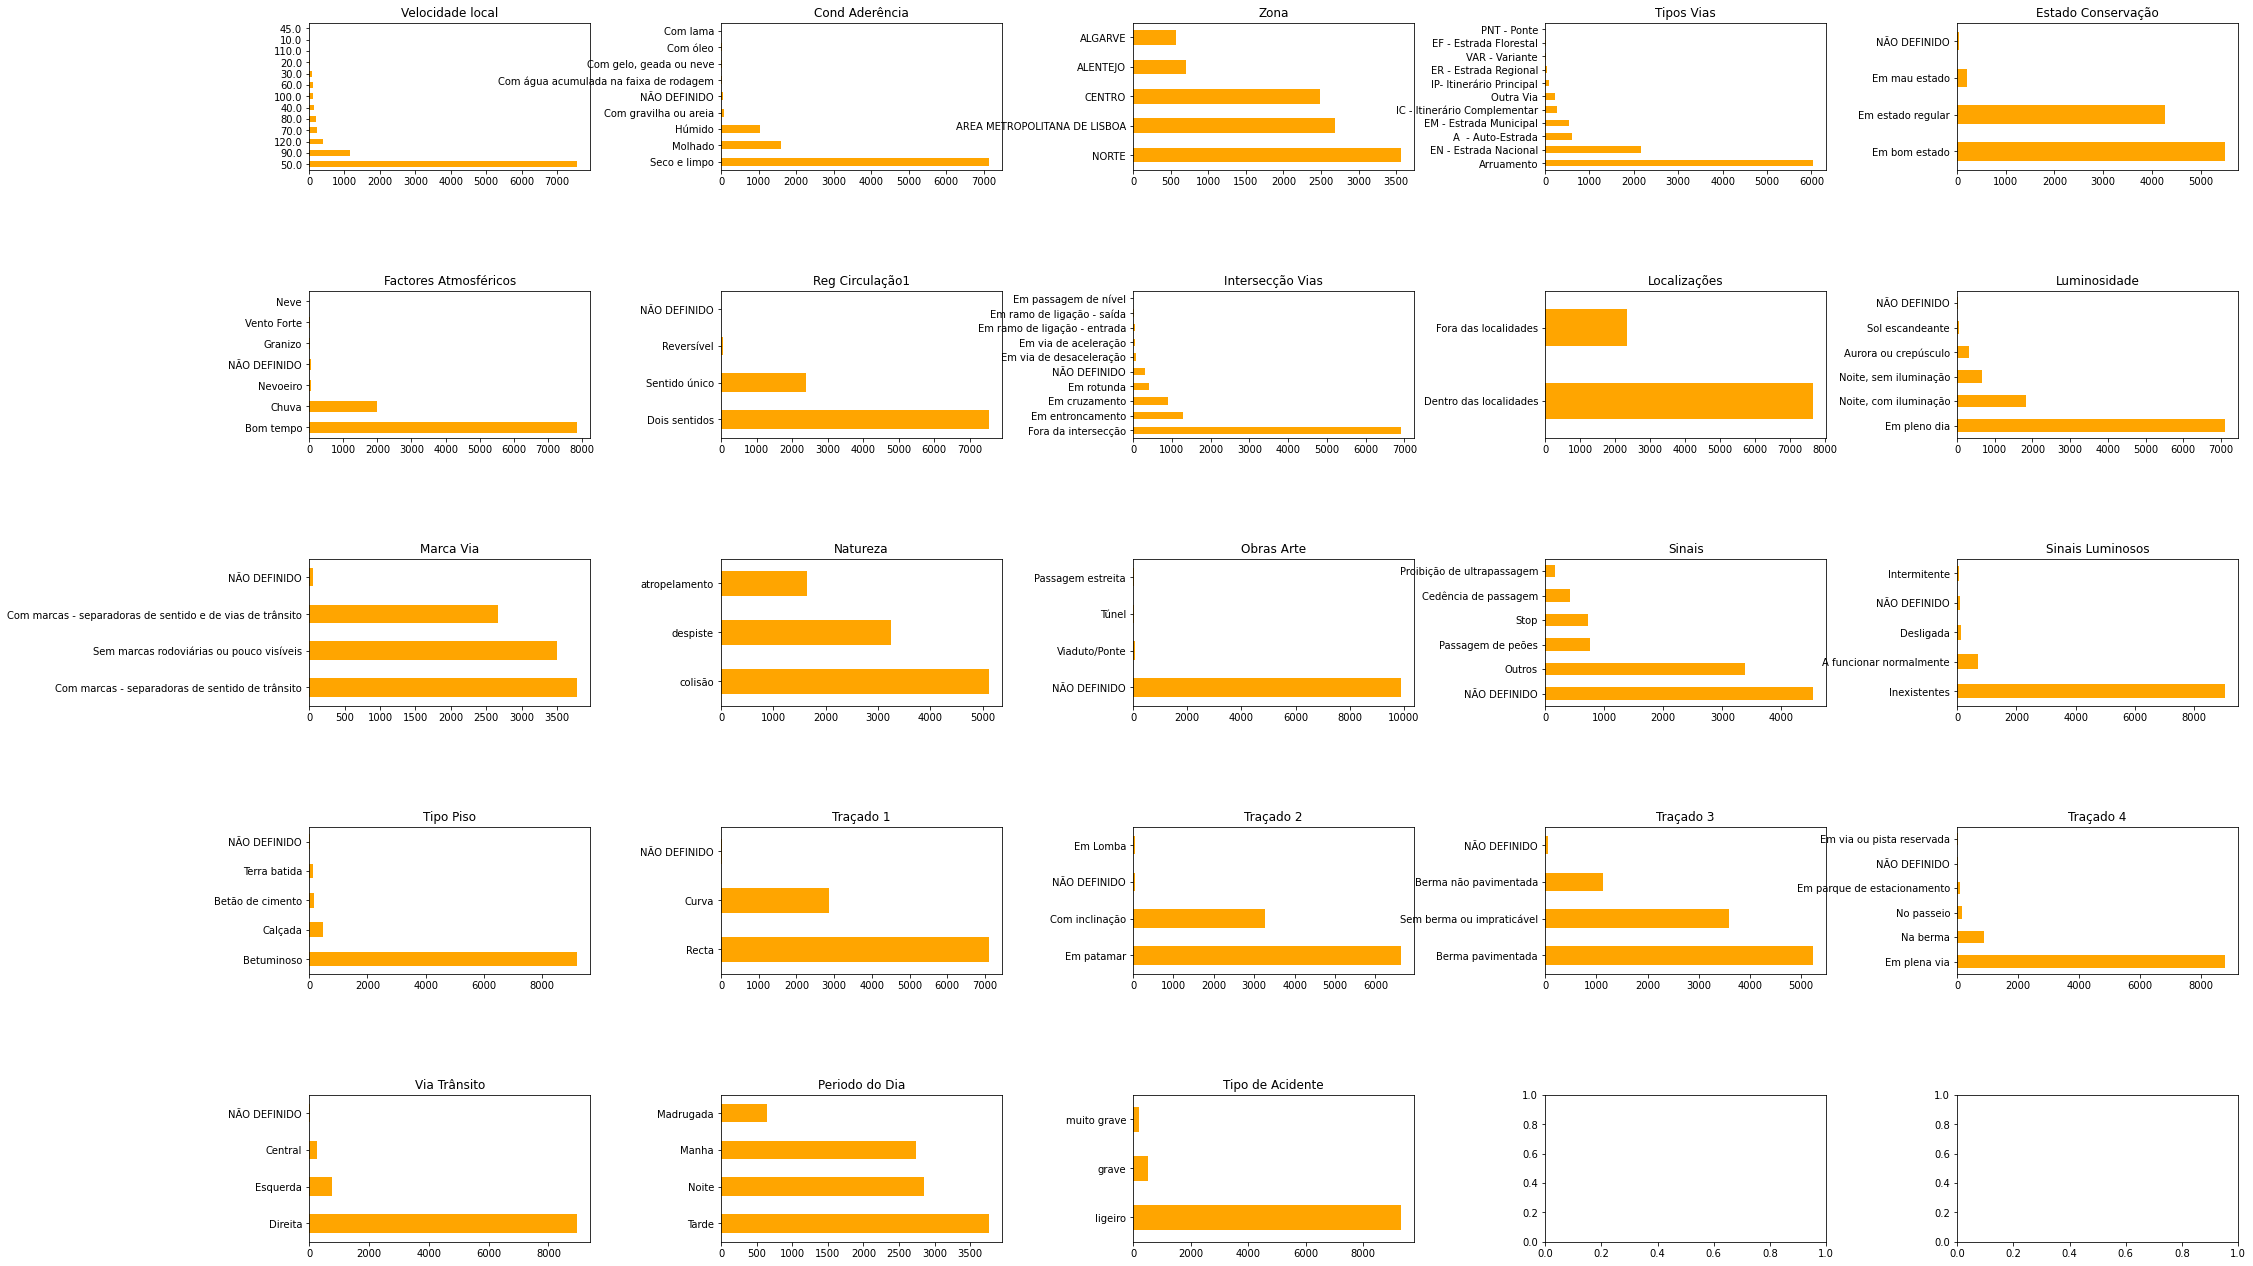

In [ ]:
atributos = ['Velocidade local',  'Cond Aderência', 'Zona',
       'Tipos Vias', 'Estado Conservação', 'Factores Atmosféricos',
       'Reg Circulação1', 'Intersecção Vias', 'Localizações', 'Luminosidade',
       'Marca Via', 'Natureza', 'Obras Arte',
       'Sinais', 'Sinais Luminosos', 'Tipo Piso', 'Traçado 1', 'Traçado 2',
       'Traçado 3', 'Traçado 4', 'Via Trânsito', 'Periodo do Dia',
       'Tipo de Acidente' ]

fig, axes = plt.subplots(nrows = 5,ncols = 5,figsize = (30,20))
fig.tight_layout(pad=10.0)
for i, item in enumerate(atributos):
    if i < 5:
        ax = acidentes_df[item].value_counts().plot(kind = 'barh',ax=axes[0,i],rot = 0,color='orange')
        
    elif i >=5 and i < 10:
        ax = acidentes_df[item].value_counts().plot(kind = 'barh',ax=axes[1,i-5],rot = 0, color='orange')
        
    elif i >=10 and i < 15:
        ax = acidentes_df[item].value_counts().plot(kind = 'barh',ax=axes[2,i-10],rot = 0, color='orange')
    elif i >=15 and i < 20:
        
        ax = acidentes_df[item].value_counts().plot(kind = 'barh',ax=axes[3,i-15],rot = 0, color='orange')
    elif i >=20 and i < 25:
        ax = acidentes_df[item].value_counts().plot(kind = 'barh',ax=axes[4,i-20],rot = 0, color='orange')
   
    ax.set_title(item)

    #unbalanced  'Cond Aderência','Obstáculos','Obras Arte', 'Tipo Piso','Sinais Luminosos'

# **Pergunta 5**

5. Calculate correlations between variables and explain any high correlations found;
https://www.statology.org/correlation-between-categorical-variables/

Categoricas:
https://www.statstest.com/cramers-v-2/

**Cramer’s V**

The analysis will result in a Cramer’s V value and a p-value. Cramer’s V ranges from 0 to 1, where 0 indicates no relationship and 1 indicates perfect association

The p-value represents the chance of seeing our results if there was no actual relationship between our variables. A p-value less than or equal to 0.05 means that our result is statistically significant and we can trust that the difference is not due to chance alone.

In [ ]:
acidentes_categoricos = acidentes_df[acidentes_df.columns.difference(['Data'])]
print(len(acidentes_categoricos.columns), len(acidentes_df.columns))

24 25


### Correlacao Cramer's V apenas atributos continuos 

In [ ]:
def cramer_correl(feature1, feature2,dataset):
  l = dataset.groupby([feature1, feature2]).size().unstack(fill_value=0)
  data = l.values
  X2 = stats.chi2_contingency(data, correction=False)[0]
  n = np.sum(data)
  minDim = min(data.shape)-1
  V = np.sqrt((X2/n) / minDim)
  return V



In [ ]:
def cramer_matrix(columns_x,columns_y,dataset):
  matrix=[]
  for  x in range(len(columns_x)):
    line = []
    for  y in range(len(columns_y)):      
      line.append(round(cramer_correl(columns_x[x], columns_y[y],dataset),2))
    matrix.append(line)
  return matrix 


In [ ]:

m = cramer_matrix(acidentes_categoricos.columns,acidentes_categoricos.columns,acidentes_categoricos)
dd = pd.DataFrame(m, index = acidentes_categoricos.columns, columns = acidentes_categoricos.columns)

<ipython-input-104-f51017b4966a>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(dd, dtype=np.bool)


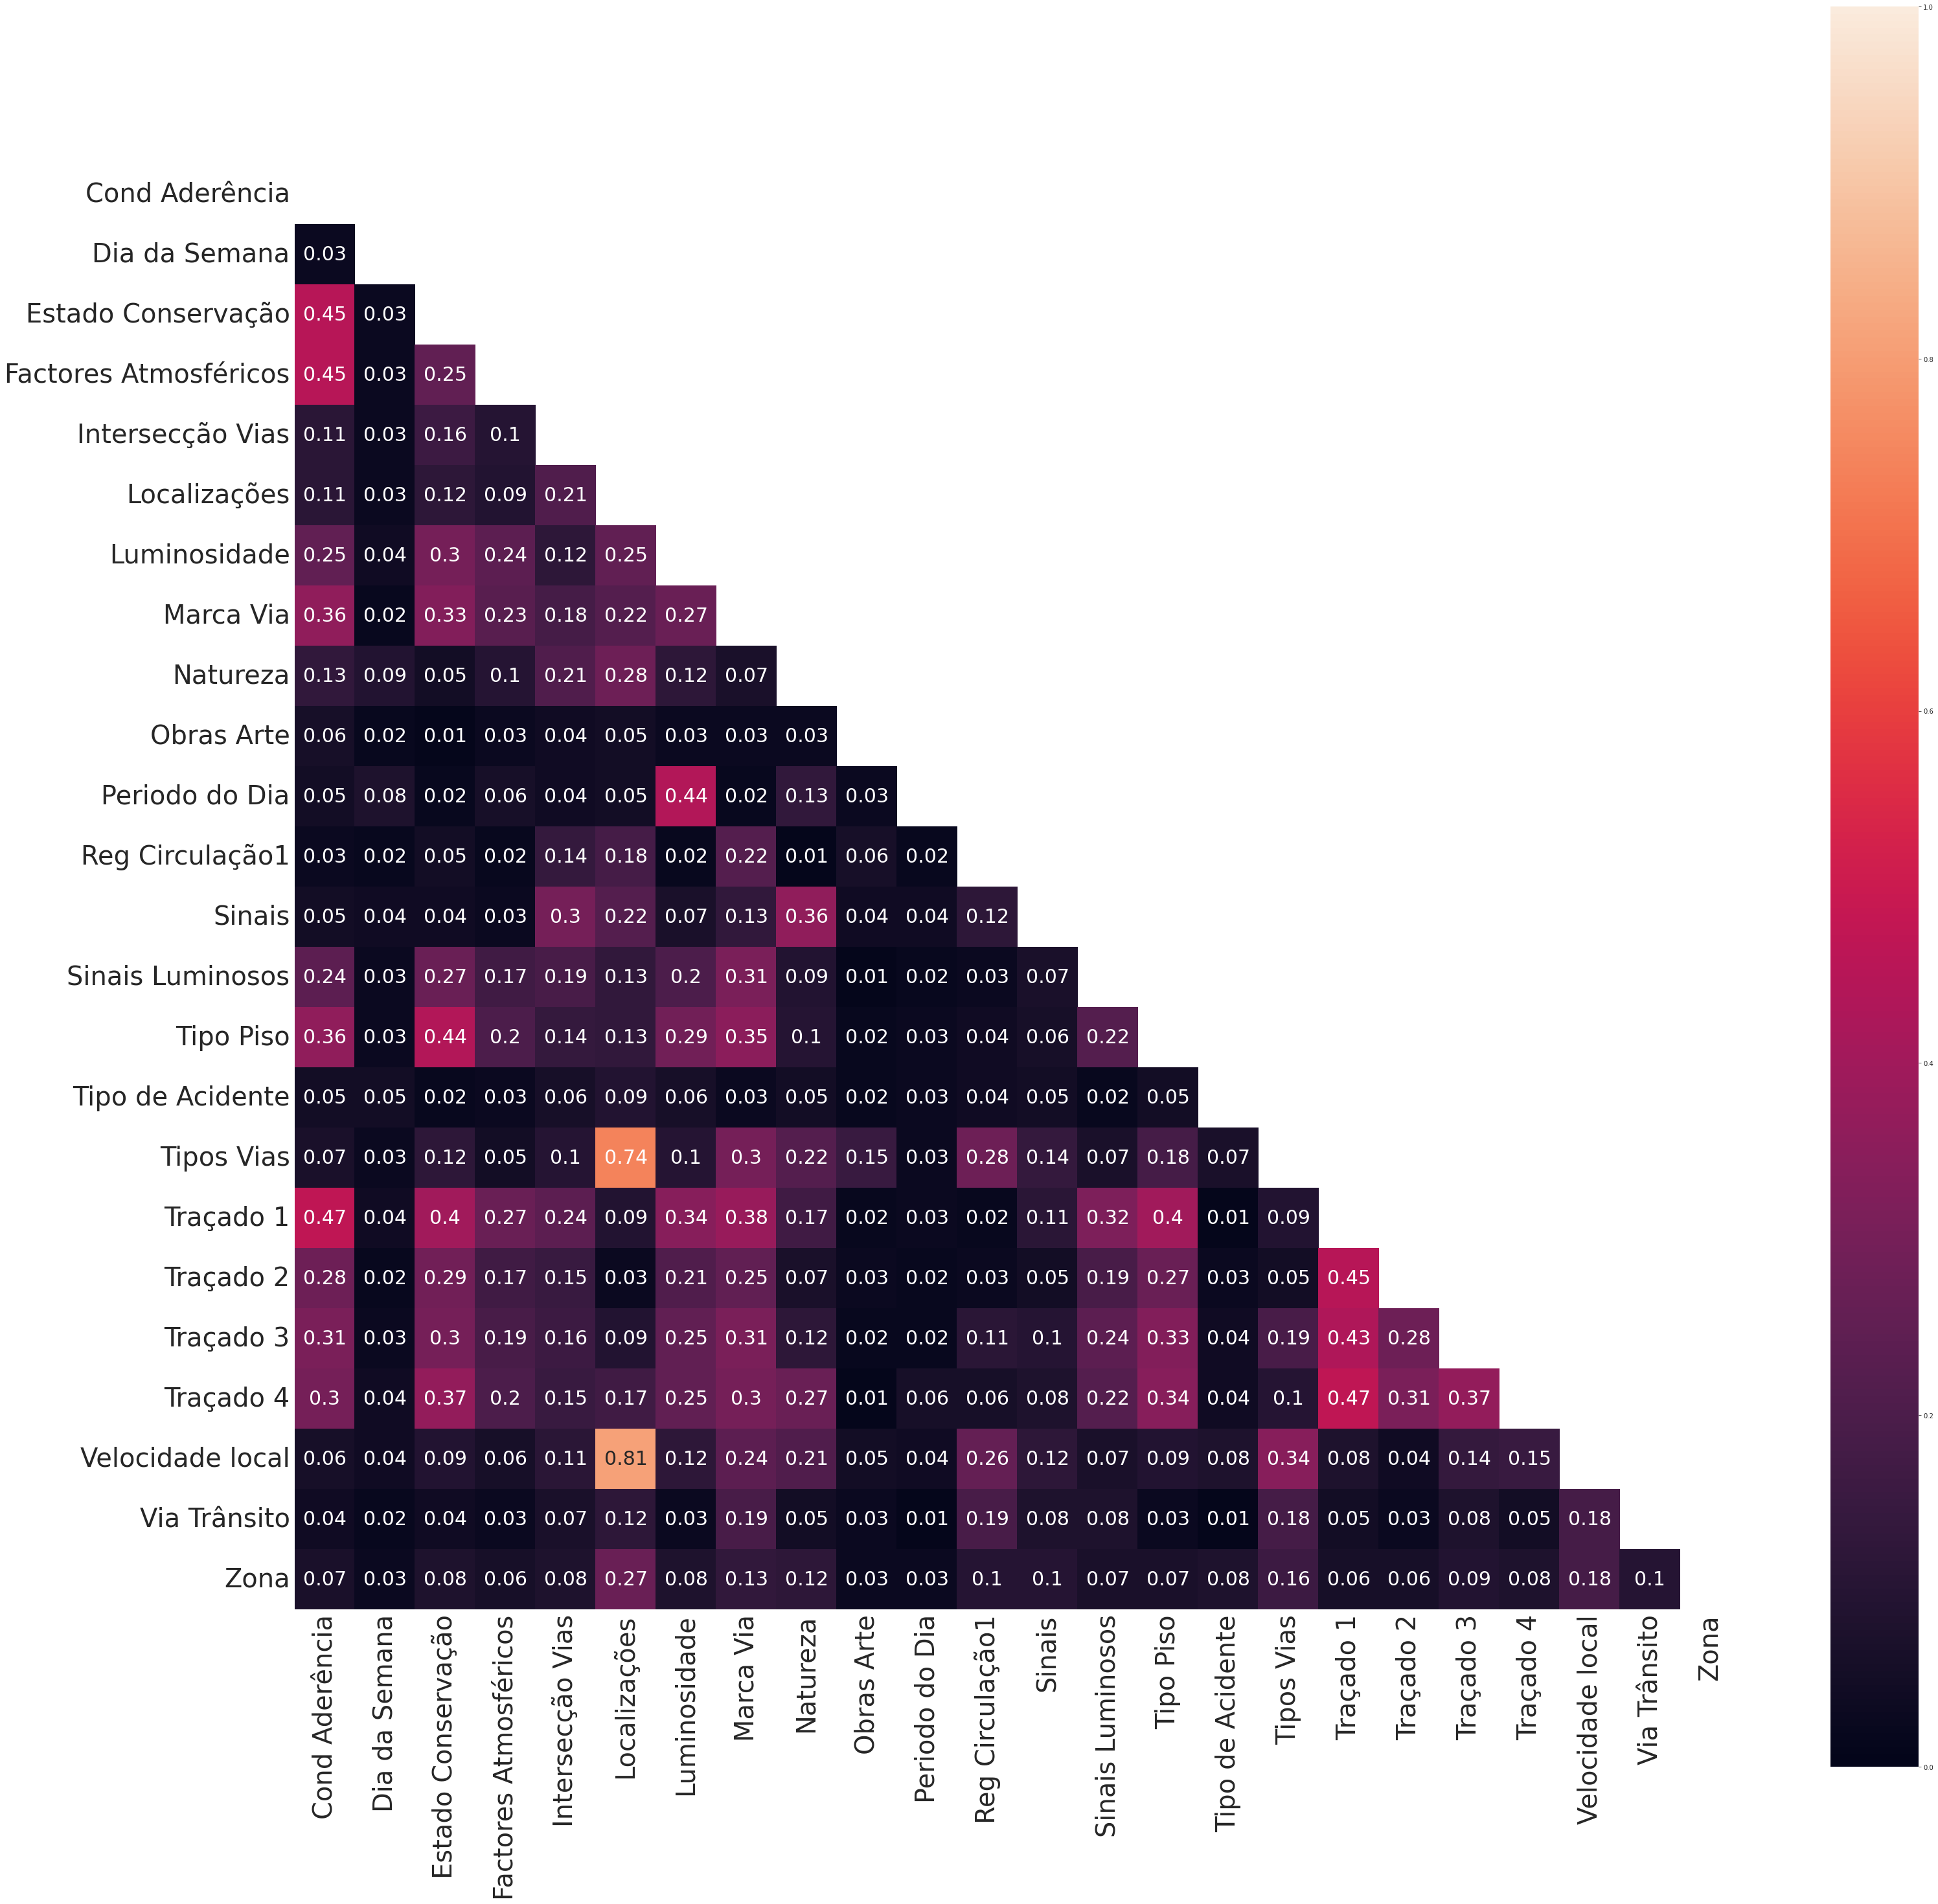

In [ ]:

mask = np.zeros_like(dd, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  fig, ax = plt.subplots(figsize=(50,50)) 
  hm = sns.heatmap(dd, mask=mask,vmin=0., vmax=1, square=True,annot=True,ax=ax,annot_kws={'size': 30})
  hm.set_xticklabels(hm.get_xmajorticklabels (), fontsize = 40)
  hm.set_yticklabels(hm.get_ymajorticklabels (), fontsize = 40,rotation=360)

plt.show()

# **Pergunta 6**

6. In unsupervised approaches (try at least two, k-Means and DB-Scan) after dividing the
set in subsets, compare representatives or subset averages with other subsets or the
general dataset to extract subset-specific characteristics (justify the choice of k in kMeans);

https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/

https://medium.com/geekculture/the-k-modes-as-clustering-algorithm-for-categorical-data-type-bcde8f95efd7

In [ ]:
acidentes_categoricos= acidentes_df[acidentes_df.columns.difference(['Data'])]


In [ ]:
def divide_data_subsets(data):
 
  first_part= data.sample(frac=0.5)
  joined_df = data.merge(first_part, how="outer", left_index=True, right_index=True)
  second_part = data[joined_df.iloc[:,-1].isna()]

  return data, first_part,second_part

In [ ]:
def plot_clusters(data,clusters_data):
  reduced_data = PCA(n_components=2).fit_transform(data)

  results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

  sns.scatterplot(x="pca1", y="pca2", hue=clusters_data, data=results)
  plt.title('K-means Clustering with 2 dimensions')
  plt.show()

### KMode

https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/

https://medium.com/geekculture/the-k-modes-as-clustering-algorithm-for-categorical-data-type-bcde8f95efd7


 no relatorio explicar o que é o Kmodes e dizer que usamos o metedo do elbow para saber o numero de clusters a usar 

 avaliar os clusters feitos, identificar as classes representativas de cada clusters para cada  dataset
 qual o subset mais parevido com o original
 


 o que fizemos:
 
 temos 3 dataset: original, first_part_df (50% do datset original), second_part_df( os outros 50%)


como fazer clusters em dadods categoricos 

 https://www.tomasbeuzen.com/post/clustering-mixed-data/

In [ ]:
kMode_datasets=divide_data_subsets(acidentes_categoricos)
len(kMode_datasets[0]),len(kMode_datasets[1]),len(kMode_datasets[2])

(10000, 5000, 5000)

In [ ]:
# Elbow curve to find optimal K
def create_elbow_cruve(dataset, max_clusters):
  cost = []  
  K=range(1,max_clusters)
  for num_clusters in list(K):
      kmode = KModes(n_clusters=num_clusters)
      kmode.fit_predict(dataset)
      cost.append(kmode.cost_)
      
  plt.plot(K, cost, 'bx-')
  plt.xlabel('No. of clusters')
  plt.ylabel('Cost')
  plt.title('Elbow Method For Optimal k')
  plt.show()

In [ ]:
def kModes_model(dataset, n_clusters):
  model = KModes(n_clusters=n_clusters)
  clusters = model.fit(dataset)
  clusters_labels=clusters.predict(dataset)
  return model.cluster_centroids_ ,clusters_labels


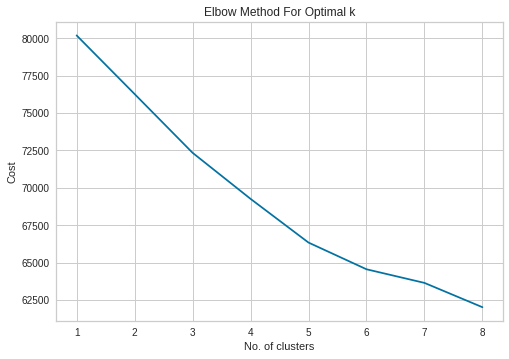

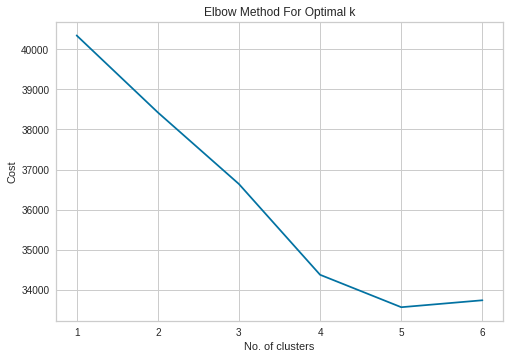

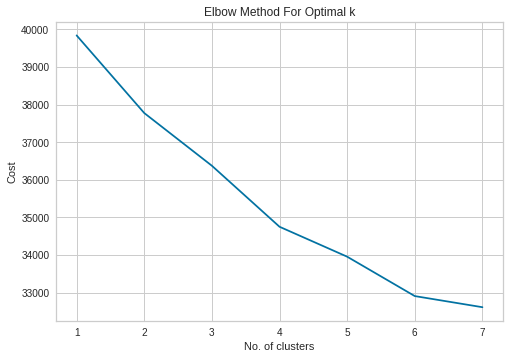

In [ ]:
create_elbow_cruve(kMode_datasets[0],9)
create_elbow_cruve(kMode_datasets[1],7)
create_elbow_cruve(kMode_datasets[2],8)

In [ ]:
print('...............clusters main data..............')
print(kModes_model(kMode_datasets[0],6))
print('...............clusters first part data..............')
print(kModes_model(kMode_datasets[1],4))
print('...............clusters secondpart data..............')
print(kModes_model(kMode_datasets[2],4))


...............clusters main data..............
(array([['Seco e limpo', 'Sexta-Feira  ', 'Em bom estado', 'Bom tempo',
        'Fora da intersecção', 'Dentro das localidades', 'Em pleno dia',
        'Com marcas - separadoras de sentido de trânsito', 'colisão',
        'NÃO DEFINIDO', 'Tarde', 'Dois sentidos', 'NÃO DEFINIDO',
        'Inexistentes', 'Betuminoso', 'ligeiro', 'Arruamento', 'Recta',
        'Em patamar', 'Berma pavimentada', 'Em plena via', '50.0',
        'Direita', 'NORTE'],
       ['Molhado', 'Quinta-Feira ', 'Em bom estado', 'Chuva',
        'Fora da intersecção', 'Fora das localidades', 'Em pleno dia',
        'Com marcas - separadoras de sentido de trânsito', 'despiste',
        'NÃO DEFINIDO', 'Manha', 'Dois sentidos', 'Outros',
        'Inexistentes', 'Betuminoso', 'ligeiro', 'EN - Estrada Nacional',
        'Curva', 'Com inclinação', 'Sem berma ou impraticável',
        'Em plena via', '90.0', 'Direita', 'CENTRO'],
       ['Seco e limpo', 'Segunda-Feira', 'Em es

### KMeans categorical variables 


K-means algorithm and one hot encoding categorical variables.

.get_dummies para passar variaveis categoricas para valores 

In [ ]:
acidentes_categoricos

In [ ]:
dummie_df=pd.get_dummies(acidentes_categoricos)

In [ ]:
dummie_df

,Velocidade local,"Cond Aderência_Com gelo, geada ou neve",Cond Aderência_Com gravilha ou areia,Cond Aderência_Com lama,Cond Aderência_Com água acumulada na faixa de rodagem,Cond Aderência_Com óleo,Cond Aderência_Húmido,Cond Aderência_Molhado,Cond Aderência_NÃO DEFINIDO,Cond Aderência_Seco e limpo,...,Traçado 4_NÃO DEFINIDO,Via Trânsito_Central,Via Trânsito_Direita,Via Trânsito_Esquerda,Via Trânsito_NÃO DEFINIDO,Zona_ALENTEJO,Zona_ALGARVE,Zona_AREA METROPOLITANA DE LISBOA,Zona_CENTRO,Zona_NORTE
0,50.0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,50.0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,50.0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,50.0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,50.0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,80.0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9996,50.0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
9997,50.0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
9998,90.0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
kMeans_datasets=divide_data_subsets(dummie_df)
len(kMeans_datasets[0]),len(kMeans_datasets[1]),len(kMeans_datasets[2])

(10000, 5000, 5000)

In [ ]:
def get_elbow_graph(data,max_clusters):  
  model = KMeans()
  visualizer = KElbowVisualizer(model, k=(1,max_clusters))
  visualizer.fit(data)        
  visualizer.show()

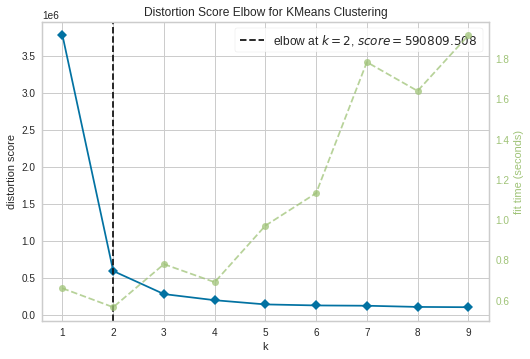

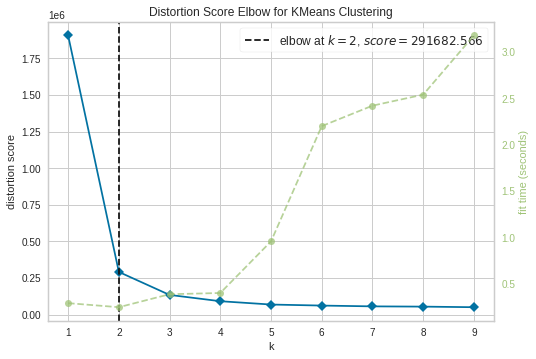

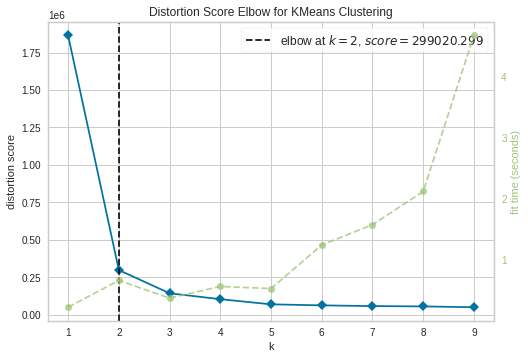

In [ ]:
get_elbow_graph(kMeans_datasets[0],10)
get_elbow_graph(kMeans_datasets[1],10)
get_elbow_graph(kMeans_datasets[2],10)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
def kmeans_get_closest_to_centroid(data,n_clusters):
  
  clusters=KMeans(n_clusters=n_clusters).fit(data)
  
  closest, _ = pairwise_distances_argmin_min(clusters.cluster_centers_, data)
  index=[]
  for i in closest:    
    index.append(acidentes_categoricos.loc[i])
  clusters_labels=clusters.predict(data)


  plot_clusters(data,clusters_labels)
  
    
  return index

...............clusters main data..............


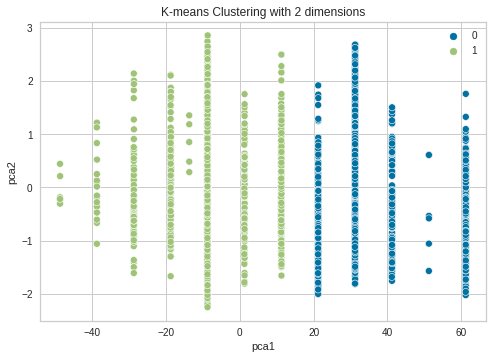

...............clusters fisrtpart data..............


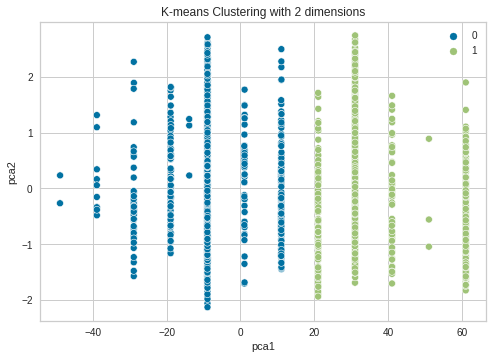

...............clusters second data..............


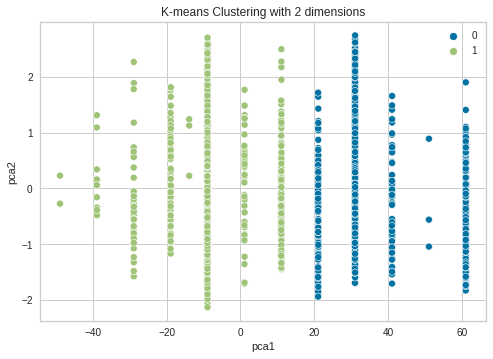

[Cond Aderência                                       Seco e limpo
 Dia da Semana                                       Segunda-Feira
 Estado Conservação                              Em estado regular
 Factores Atmosféricos                                   Bom tempo
 Intersecção Vias                              Fora da intersecção
 Localizações                               Dentro das localidades
 Luminosidade                                         Em pleno dia
 Marca Via                Sem marcas rodoviárias ou pouco visíveis
 Natureza                                                 despiste
 Obras Arte                                           NÃO DEFINIDO
 Periodo do Dia                                              Tarde
 Reg Circulação1                                     Dois sentidos
 Sinais                                               NÃO DEFINIDO
 Sinais Luminosos                                     Inexistentes
 Tipo Piso                                              Betumi

In [ ]:
print('...............clusters main data..............')
kmeans_get_closest_to_centroid(kMeans_datasets[0],2)
print('...............clusters fisrtpart data..............')
kmeans_get_closest_to_centroid(kMeans_datasets[1],2)
print('...............clusters second data..............')
kmeans_get_closest_to_centroid(kMeans_datasets[1],2)


### DBSCAN

Como fica o elbow method se passarmos os dados categoricos para:

1. atributos com numeros inteiros
2. usando get_dummies

1ºMetodo

In [ ]:
integer_df= acidentes_df[acidentes_df.columns.difference(['Data'])]

In [ ]:
le = LabelEncoder()
for i in integer_df.columns:
  integer_df[i] = le.fit_transform(integer_df[i])



<ipython-input-135-fa5986ef15d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  integer_df[i] = le.fit_transform(integer_df[i])


In [ ]:
integer_df

,Cond Aderência,Dia da Semana,Estado Conservação,Factores Atmosféricos,Intersecção Vias,Localizações,Luminosidade,Marca Via,Natureza,Obras Arte,Periodo do Dia,Reg Circulação1,Sinais,Sinais Luminosos,Tipo Piso,Tipo de Acidente,Tipos Vias,Traçado 1,Traçado 2,Traçado 3,Traçado 4,Velocidade local,Via Trânsito,Zona
0,5,3,1,0,8,0,1,3,1,0,3,0,2,2,0,1,1,2,2,0,1,5,1,3
1,8,4,1,0,8,0,1,0,1,0,3,0,1,2,0,1,4,2,2,1,1,5,1,3
2,5,2,1,1,8,0,3,0,2,0,0,0,1,2,0,1,4,2,2,3,1,5,1,3
3,5,5,1,0,8,0,1,1,0,0,1,0,3,2,0,1,1,2,0,1,1,5,1,2
4,8,5,0,0,8,0,1,0,0,0,3,0,2,2,0,1,1,0,2,1,1,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8,4,1,0,8,0,2,3,1,0,2,3,2,2,0,1,1,2,2,1,1,8,2,2
9996,6,0,1,1,8,0,1,0,2,0,1,0,1,2,0,1,4,0,0,0,1,5,1,4
9997,6,6,0,0,8,1,3,3,2,3,2,0,1,2,0,1,3,0,0,3,1,5,1,3
9998,5,3,0,1,8,1,3,3,2,0,2,0,1,2,0,1,3,0,0,3,3,9,1,4


In [ ]:
dbscan_int_datasets=divide_data_subsets(integer_df)
len(dbscan_int_datasets[0]),len(dbscan_int_datasets[1]),len(dbscan_int_datasets[2])

(10000, 5000, 5000)

In [ ]:
def choose_best_epsilon(data):
  neighbors = NearestNeighbors(n_neighbors=48)
  neighbors_fit = neighbors.fit(data)
  distances, indices = neighbors_fit.kneighbors(data)
  distances = np.sort(distances, axis=0)
  distances = distances[:,1]
  plt.plot(distances)
  plt.show()

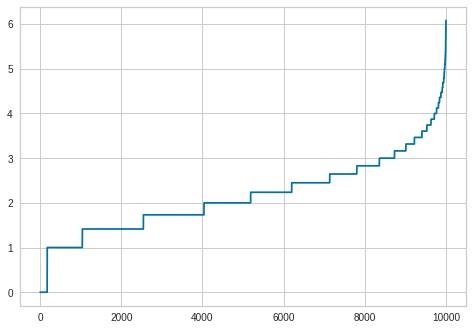

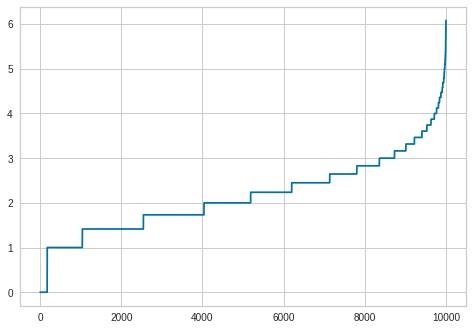

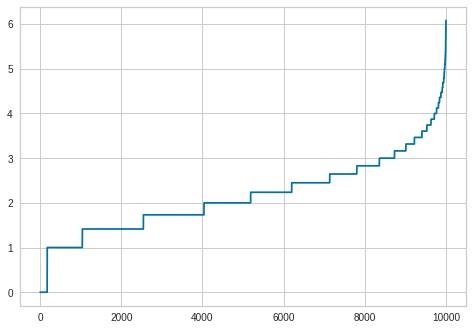

In [ ]:
choose_best_epsilon(dbscan_int_datasets[0])
choose_best_epsilon(dbscan_int_datasets[1])
choose_best_epsilon(dbscan_int_datasets[2])

2ºmetodo

usei este site para calcular o melhor epsilon e o min de clustes

https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998). Logo MinPts = 2x24=48

In [ ]:
dummie_df=acidentes_df[acidentes_df.columns.difference(['Data'])]

In [ ]:
dummie_df=pd.get_dummies(dummie_df)

In [ ]:
dbscan_dummie_datasets=divide_data_subsets(dummie_df)
len(dbscan_dummie_datasets[0]),len(dbscan_dummie_datasets[1]),len(dbscan_dummie_datasets[2])

(10000, 5000, 5000)

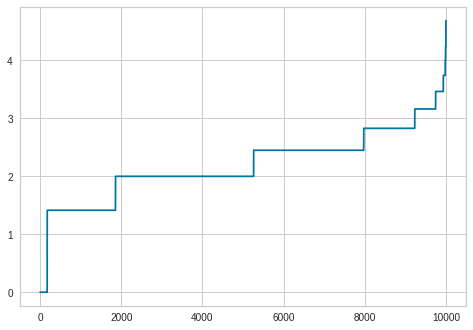

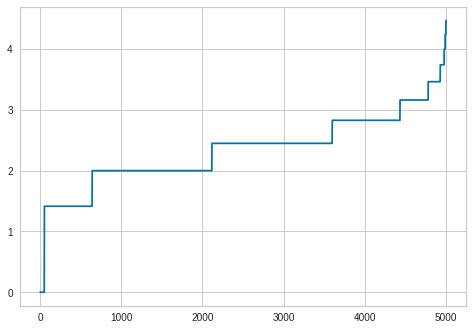

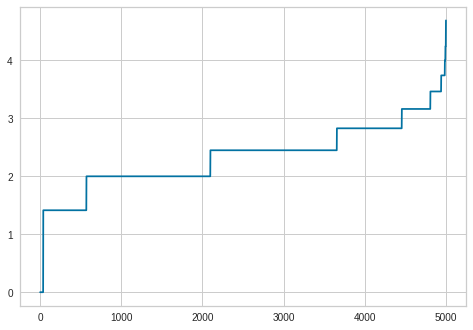

In [ ]:
choose_best_epsilon(dbscan_dummie_datasets[0])
choose_best_epsilon(dbscan_dummie_datasets[1])
choose_best_epsilon(dbscan_dummie_datasets[2])

Conclusoes podemos ver uma curvatura mais acentuada quando se usa o dataset onde os atibutos categroicos foram tranformados para inteiros 

In [ ]:
def dbsacn_method(data, eps):
  db = DBSCAN(eps=eps, min_samples=48)
  db.fit(data)


  labels=db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_noise_ = list(labels).count(-1)
  
  print("Estimated number of clusters: %d" % n_clusters_)
  print("Estimated number of noise points: %d" % n_noise_)
  
  return m.labels_



In [ ]:
print(dbsacn_method(dbscan_int_datasets[0],3))
print(dbsacn_method(dbscan_int_datasets[1],4))
print(dbsacn_method(dbscan_int_datasets[2],4))

Estimated number of clusters: 3
Estimated number of noise points: 4989


NameError: ignored

# **Pergunta 7**

7. Evaluate the possibility of predicting the seriousness of the injuries based on the remaining accident data. Notice that for supervised learning the unbalanced data is
serious problem, especially when the target has much more examples of one class
than others.
To avoid this, collect data from all files using all cases of accidents that have other types
of injuries other than "light injuries". Then sample a number of light-injuries accidents
equal to the number of non-light injuries cases. Decide whether or not to use the
remaining classes of injuries. In any case maintain only two classes of target values.
Decide whether or not to use information from passengers and pedestrians. Report
on all of these decisions. Create a reasonably balanced dataset with two classes;

In [4]:
acidentes_df.groupby(['Tipo de Acidente']).size()

Tipo de Acidente
grave           502
ligeiro        9304
muito grave     194
dtype: int64

In [ ]:
# OS 3 TIPOS DE ACIDENTES COM IGUAL FREQUENCIA
# injures_df= pd.DataFrame(columns = acidentes_df.columns)

# muito_grave_injures=acidentes_df[acidentes_df['Tipo de Acidente']=='muito grave' ]
# injures_df=pd.concat([injures_df,muito_grave_injures], ignore_index = True)

# grave_injures=acidentes_df[acidentes_df['Tipo de Acidente']=='grave'].sample(194)
# injures_df=pd.concat([injures_df,grave_injures], ignore_index = True)

# ligeiro_injures=acidentes_df[acidentes_df['Tipo de Acidente']=='ligeiro'].sample(194)
# injures_df=pd.concat([injures_df,ligeiro_injures], ignore_index = True)



In [5]:
#FICAR APENA COM ACIDENTES LIGEIROS E OS OUTROS (GRAVE E MUITO GRAVE ) JUNTOS 
#NOME DA COLUNA Tipo de Acidente ='Acidente Ligeiro' E VALORES COM TRUE OU FALSE
injures_df= pd.DataFrame(columns = acidentes_df.columns)

muito_grave_injures=acidentes_df[(acidentes_df['Tipo de Acidente']=='muito grave') | (acidentes_df['Tipo de Acidente']=='grave')]
injures_df=pd.concat([injures_df,muito_grave_injures], ignore_index = True)
ligeiro_injures=acidentes_df[acidentes_df['Tipo de Acidente']=='ligeiro'].sample(len(injures_df))
injures_df=pd.concat([injures_df,ligeiro_injures], ignore_index = True)

In [6]:
injures_df['Tipo de Acidente'] = injures_df['Tipo de Acidente'].str.replace('muito grave', 'False')
injures_df['Tipo de Acidente'] = injures_df['Tipo de Acidente'].str.replace('grave', 'False')
injures_df['Tipo de Acidente'] = injures_df['Tipo de Acidente'].str.replace('ligeiro', 'True')

injures_df=injures_df.rename(columns={'Tipo de Acidente':'Acidente Ligeiro'})


In [7]:
injures_df.groupby(['Acidente Ligeiro']).size()

Acidente Ligeiro
False    696
True     696
dtype: int64

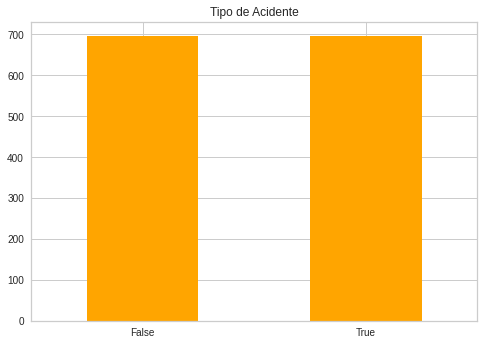

In [8]:
injures_df['Acidente Ligeiro'].value_counts().plot(kind = 'bar',rot = 0,color='orange',title="Tipo de Acidente")

In [ ]:
injures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Velocidade local       1392 non-null   float64
 1   Dia da Semana          1392 non-null   object 
 2   Cond Aderência         1392 non-null   object 
 3   Zona                   1392 non-null   object 
 4   Tipos Vias             1392 non-null   object 
 5   Estado Conservação     1392 non-null   object 
 6   Factores Atmosféricos  1392 non-null   object 
 7   Reg Circulação1        1392 non-null   object 
 8   Intersecção Vias       1392 non-null   object 
 9   Localizações           1392 non-null   object 
 10  Luminosidade           1392 non-null   object 
 11  Marca Via              1392 non-null   object 
 12  Natureza               1392 non-null   object 
 13  Obras Arte             1392 non-null   object 
 14  Sinais                 1392 non-null   object 
 15  Sina

In [9]:
#CORREALACO COM A VARIAVEL 'Acidente Ligeiro' VER QUAIS AS COLUNAS A USAR para fazer previsoes 


m=cramer_matrix(['Acidente Ligeiro'],injures_df.columns,injures_df)
dd = pd.DataFrame(m, index = ['Acidente Ligeiro'], columns = injures_df.columns)
pd.set_option('display.max_columns', None)
dd

NameError: ignored

In [10]:
injures_reduze_df=injures_df[['Acidente Ligeiro','Velocidade local','Dia da Semana','Cond Aderência','Zona','Tipos Vias', 'Factores Atmosféricos','Reg Circulação1','Intersecção Vias','Localizações','Luminosidade','Natureza','Sinais','Tipo Piso','Traçado 4']]

# **Pergunta 8**

8. Test three training/validation partitions in each supervised learning trial: k-fold crossvalidation and two simple cross-validations with different datasets: random 30% and
last 30% splits;


https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right


In [11]:
injures_reduze_df.columns, len(injures_reduze_df)

(Index(['Acidente Ligeiro', 'Velocidade local', 'Dia da Semana',
        'Cond Aderência', 'Zona', 'Tipos Vias', 'Factores Atmosféricos',
        'Reg Circulação1', 'Intersecção Vias', 'Localizações', 'Luminosidade',
        'Natureza', 'Sinais', 'Tipo Piso', 'Traçado 4'],
       dtype='object'), 1392)

In [12]:
le = LabelEncoder()
for i in injures_reduze_df.columns:
  injures_reduze_df[i] = le.fit_transform(injures_reduze_df[i])



<ipython-input-12-fca567956b34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injures_reduze_df[i] = le.fit_transform(injures_reduze_df[i])


In [13]:
injures_reduze_df

,Acidente Ligeiro,Velocidade local,Dia da Semana,Cond Aderência,Zona,Tipos Vias,Factores Atmosféricos,Reg Circulação1,Intersecção Vias,Localizações,Luminosidade,Natureza,Sinais,Tipo Piso,Traçado 4
0,0,4,1,8,3,4,0,3,5,1,1,1,1,0,1
1,0,4,3,8,2,3,0,0,8,1,5,1,1,0,1
2,0,4,2,5,2,4,0,0,8,0,1,2,2,0,3
3,0,4,6,8,4,4,0,0,8,1,1,1,1,0,1
4,0,8,5,6,4,7,1,0,8,1,1,2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1,11,2,8,4,0,0,3,8,1,1,2,1,0,1
1388,1,4,6,8,4,1,0,3,8,0,1,0,2,0,1
1389,1,4,6,8,3,1,0,0,8,0,2,0,3,0,1
1390,1,4,0,5,2,4,1,0,8,0,1,1,2,0,1


## k-fold crossvalidation

In [14]:
from sklearn.model_selection import KFold


kf = KFold(n_splits=3)
kf.get_n_splits(injures_reduze_df)

print(kf)

for i, (train_index_kFold, test_index_kFold) in enumerate(kf.split(injures_reduze_df)):
    print(f"Fold {i}:")
    print(f"  Train: index={len(train_index_kFold)}")
    print(f"  Test:  index={len(test_index_kFold)}")

KFold(n_splits=3, random_state=None, shuffle=False)
Fold 0:
  Train: index=928
  Test:  index=464
Fold 1:
  Train: index=928
  Test:  index=464
Fold 2:
  Train: index=928
  Test:  index=464


## Simple Cross Validation

o que é que eu percebi 

1º cross validation- 70% dos dados do dataset para treino e 30% dos dados para teste , este ultimos devem ser random

2º cross validation - 70% dos primeiros dados do dataset para treino e 30% dos ultimos dados para teste

In [15]:
X = injures_reduze_df[injures_reduze_df.columns.difference(['Acidente Ligeiro'])]
y = injures_reduze_df.loc[:, ['Acidente Ligeiro']]

In [16]:
X

,Cond Aderência,Dia da Semana,Factores Atmosféricos,Intersecção Vias,Localizações,Luminosidade,Natureza,Reg Circulação1,Sinais,Tipo Piso,Tipos Vias,Traçado 4,Velocidade local,Zona
0,8,1,0,5,1,1,1,3,1,0,4,1,4,3
1,8,3,0,8,1,5,1,0,1,0,3,1,4,2
2,5,2,0,8,0,1,2,0,2,0,4,3,4,2
3,8,6,0,8,1,1,1,0,1,0,4,1,4,4
4,6,5,1,8,1,1,2,0,2,0,7,3,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,8,2,0,8,1,1,2,3,1,0,0,1,11,4
1388,8,6,0,8,0,1,0,3,2,0,1,1,4,4
1389,8,6,0,8,0,2,0,0,3,0,1,1,4,3
1390,5,0,1,8,0,1,1,0,2,0,4,1,4,2


In [17]:
y

,Acidente Ligeiro
0,0
1,0
2,0
3,0
4,0
...,...
1387,1
1388,1
1389,1
1390,1


In [18]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)

In [19]:
y_train_1

,Acidente Ligeiro
252,0
864,1
311,0
472,0
1293,1
...,...
763,1
835,1
1216,1
559,0


In [20]:
y_test_1

,Acidente Ligeiro
669,0
330,0
1032,1
442,0
141,0
...,...
349,0
1234,1
371,0
887,1


In [21]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y,shuffle=False,
                                                    test_size=0.3)

In [22]:
y_train_2

,Acidente Ligeiro
0,0
1,0
2,0
3,0
4,0
...,...
969,1
970,1
971,1
972,1


In [23]:
y_test_2

,Acidente Ligeiro
974,1
975,1
976,1
977,1
978,1
...,...
1387,1
1388,1
1389,1
1390,1


# **Pergunta 9**

Use at least three supervised methods: 

  1.   Decision Tree
  2.   Multi Layer Perceptron (NeuralNetworks)
  3. XGBoost.

The evaluation of the generated models should include different metrics and means to better understand the errors of the supervised learning
approaches, namely:
  1. confusion matrices
  2. F-scores. 

For any method that contains a random decision / initialization the result must be an average of 30 trials.

## **Decision Tree**

https://towardsdatascience.com/understanding-decision-tree-classification-with-scikit-learn-2ddf272731bd

https://www.baeldung.com/cs/cross-validation-decision-trees



*   Since these are categorical variables if we want to apply decision tree classifier and fit to data, first we need to create dummy variables.



In [24]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import tree


In [ ]:
y_train_1

,Acidente Ligeiro
252,0
864,1
311,0
472,0
1293,1
...,...
763,1
835,1
1216,1
559,0


In [ ]:
def decision_tree_classifier(X_train, y_train, X_test, y_test):
  clf_Dtree = tree.DecisionTreeClassifier()
  clf_Dtree.fit(X_train, y_train)
  y_pred = clf_Dtree.predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  #tree.plot_tree(classifier)

### K-fold

In [ ]:
score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), X, y, cv= kf)
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')


from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(tree.DecisionTreeClassifier(random_state= 42), X, y, cv= kf)
print(y_pred)
conf_mat = confusion_matrix(y, y_pred)
print(f'Scores for each fold are: {conf_mat}')
print(classification_report(y, y_pred))

Scores for each fold are: [0.375      0.55172414 0.37931034]
Average score: 0.44
[1 0 1 ... 0 1 1]
Scores for each fold are: [[300 396]
 [390 306]]
              precision    recall  f1-score   support

           0       0.43      0.43      0.43       696
           1       0.44      0.44      0.44       696

    accuracy                           0.44      1392
   macro avg       0.44      0.44      0.44      1392
weighted avg       0.44      0.44      0.44      1392



### Random simple cross-validation

In [ ]:
decision_tree_classifier(X_train_1, y_train_1, X_test_1, y_test_1)

[[112  98]
 [ 89 119]]
              precision    recall  f1-score   support

           0       0.56      0.53      0.55       210
           1       0.55      0.57      0.56       208

    accuracy                           0.55       418
   macro avg       0.55      0.55      0.55       418
weighted avg       0.55      0.55      0.55       418



### Simple cross-validation

In [ ]:
decision_tree_classifier(X_train_2, y_train_2, X_test_2, y_test_2)

[[  0   0]
 [251 167]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.40      0.57       418

    accuracy                           0.40       418
   macro avg       0.50      0.20      0.29       418
weighted avg       1.00      0.40      0.57       418



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Multi Layer Perceptron (NeuralNetworks)**

In [25]:
from sklearn.neural_network import MLPClassifier
def nueral_networks_classifier(X_train, y_train, X_test, y_test):
  clf_NN = MLPClassifier(solver='lbfgs', alpha=1e-5,
                      hidden_layer_sizes=(5, 2), random_state=1)

  clf_NN.fit(X_train, y_train)
  y_pred = clf_NN.predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))


### K-fold

In [ ]:
score = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), X, y, cv= kf)
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')


from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(tree.DecisionTreeClassifier(random_state= 42), X, y, cv= kf)
print(y_pred)
conf_mat = confusion_matrix(y, y_pred)
print(f'Scores for each fold are: {conf_mat}')
print(classification_report(y, y_pred))

### Random simple cross-validation

In [26]:
nueral_networks_classifier(X_train_1, y_train_1, X_test_1, y_test_1)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[131  79]
 [ 90 118]]
              precision    recall  f1-score   support

           0       0.59      0.62      0.61       210
           1       0.60      0.57      0.58       208

    accuracy                           0.60       418
   macro avg       0.60      0.60      0.60       418
weighted avg       0.60      0.60      0.60       418



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Simple cross-validation

In [27]:
nueral_networks_classifier(X_train_2, y_train_2, X_test_2, y_test_2)

[[  0   0]
 [418   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00     418.0

    accuracy                           0.00     418.0
   macro avg       0.00      0.00      0.00     418.0
weighted avg       0.00      0.00      0.00     418.0



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

# **Coisas**

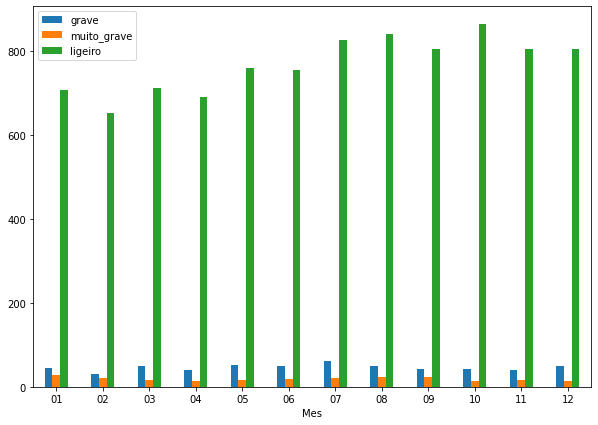

In [ ]:

type_mes_groupby = acidentes_df.groupby([ 'Tipo de Acidente','Mes']).size()
grave=type_mes_groupby['grave'].tolist()
muito_grave=type_mes_groupby['muito grave'].tolist()
ligeiro=type_mes_groupby['ligeiro'].tolist()

df = pd.DataFrame({'Mes':mes_groupby.groups.keys(), 'grave':grave,'muito_grave':muito_grave,'ligeiro':ligeiro})
ax = df.plot.bar(x='Mes', y=['grave','muito_grave','ligeiro'], rot=0,figsize=(10, 7))

